# **Using Seaborn and Matplotlib Together - Exercises**

In [1]:
# load the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise:

In this exercise we use the `penguins` dataset from the `seaborn` library:
`penguins = sns.load_dataset("penguins")`

1. Create a scatter plot showing the relationship between `bill_length_mm` and `bill_depth_mm`, using a different color for each `species`.
2. Create histogram with a kernel density estimate on top of it for `body_mass_g` for each `species`.
3. Show the mean `body_mass_g` for each `species` and `sex` using a bar plot. As error bars, show confidence intervals (ci) of 95%.
4. Create a box plot of comparing the `body_mass_g` for each `species` and `sex`.
5. Create a violin plot of comparing the `body_mass_g` for each `species` and `sex`.

In [2]:
# load the penguins dataset
penguins = sns.load_dataset("penguins")

### 1. Create a scatter plot showing the relationship between `bill_length_mm` and `bill_depth_mm`, using a different color for each `species`.

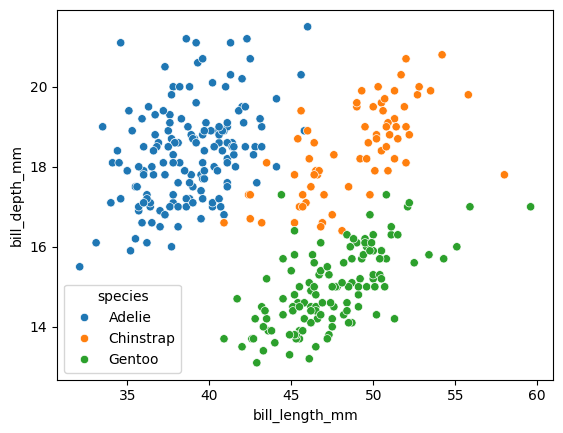

In [3]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.show()

### 2. Create histogram with a kernel density estimate on top of it for `body_mass_g` for each `species`.

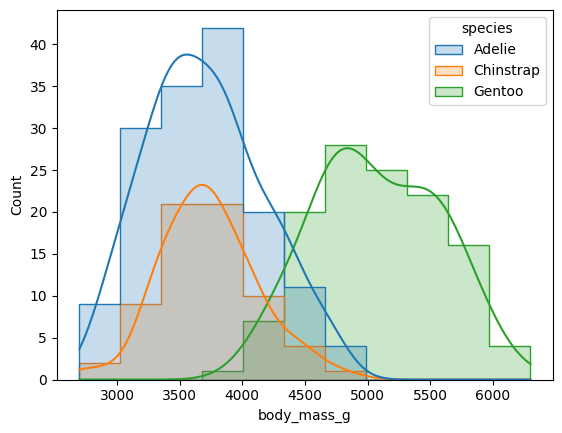

In [4]:
sns.histplot(data=penguins, x="body_mass_g", hue="species", element="step", fill=True, kde=True)
plt.show()

### 3. Show the mean `body_mass_g` for each `species` and `sex` using a bar plot. As error bars, show confidence intervals (ci) of 95%.

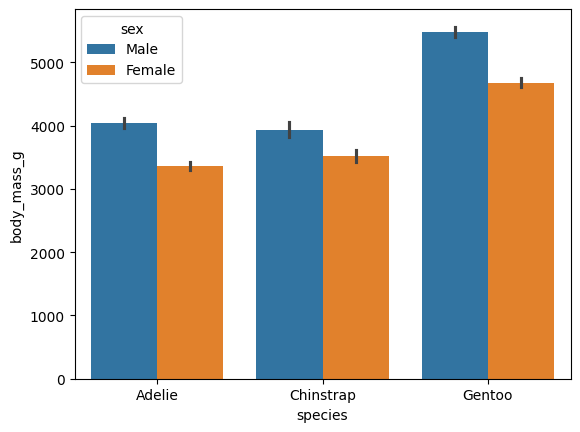

In [5]:
sns.barplot(data=penguins, x="species", y="body_mass_g", hue="sex", errorbar=("ci", 95))
plt.show()

### 4. Create a box plot of comparing the `body_mass_g` for each `species` and `sex`.

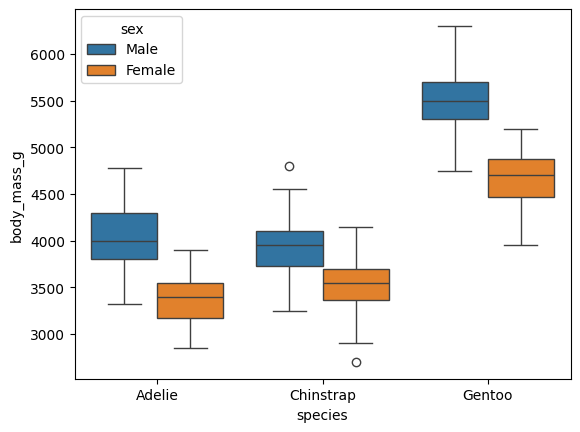

In [6]:
sns.boxplot(data=penguins, x="species", y="body_mass_g", hue="sex")
plt.show()

### 5. Create a violin plot of comparing the `body_mass_g` for each `species` and `sex`.

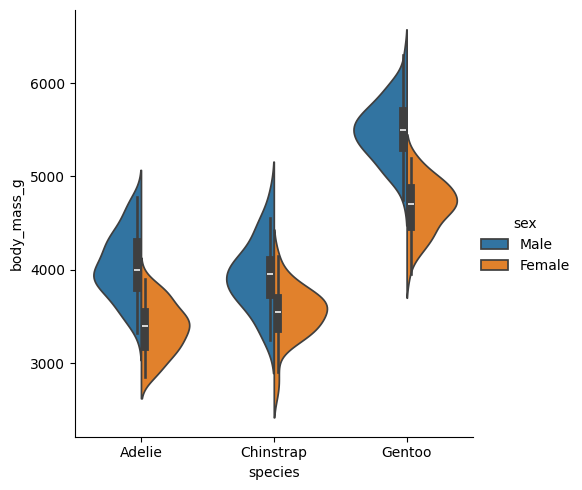

In [7]:
sns.catplot(data=penguins, x="species", y="body_mass_g", hue="sex", kind="violin", split=True)
plt.show()

## Exercise - continued:
6. Create a heatmap of the correlation matrix of the `penguins` dataset. Hint: select onl the numerical columns and use the `DataFrame.corr()` method.
7. Create a jointplot of `bill_length_mm` and `bill_depth_mm` with a hexbin plot and marginal histograms.
8. Create a 3x1 grid (3 rows, 1 column) with histograms of `bill_length_mm` for each `species`.
9. Create a facet grid with scattplots of `body_mass_g` vs. `flipper_length_mm` for each `species`.
10. Bonus: improve the facet grid from task 2 by adding a reference line at the median value of `bill_length_mm` for each species. Hint: create a new plotting and use it with the `FacetGrid.map()`.
11. Bonus: recreate the heatmap from task 6, but use the style "dark", color palette "viridis" and context "talk"

### 6. Create a heatmap of the correlation matrix of the `penguins` dataset. Hint: select onl the numerical columns and use the `DataFrame.corr()` method.

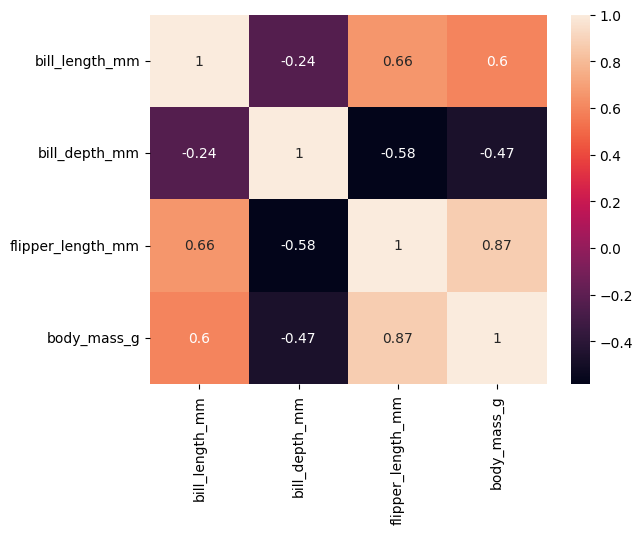

In [8]:
sns.heatmap(penguins.select_dtypes("float").corr(), annot=True)
plt.show()

### 7. Create a jointplot of `bill_length_mm` and `bill_depth_mm` with a hexbin plot and marginal histograms.

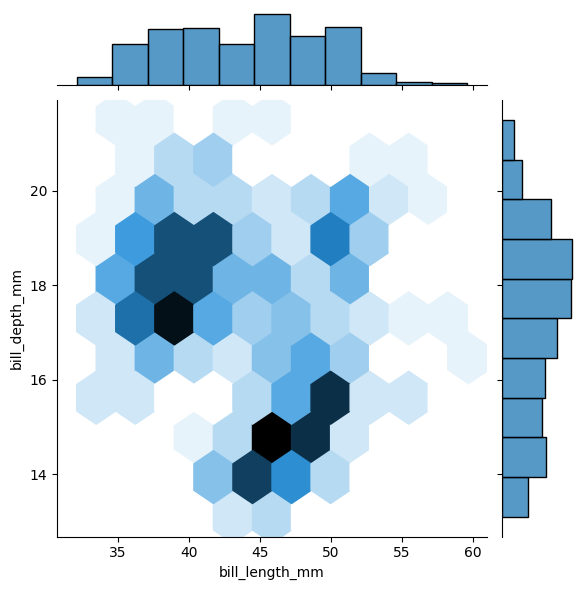

In [9]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex")
plt.show()

### 8. Create a 3x1 grid (3 rows, 1 column) with histograms of `bill_length_mm` for each `species`.

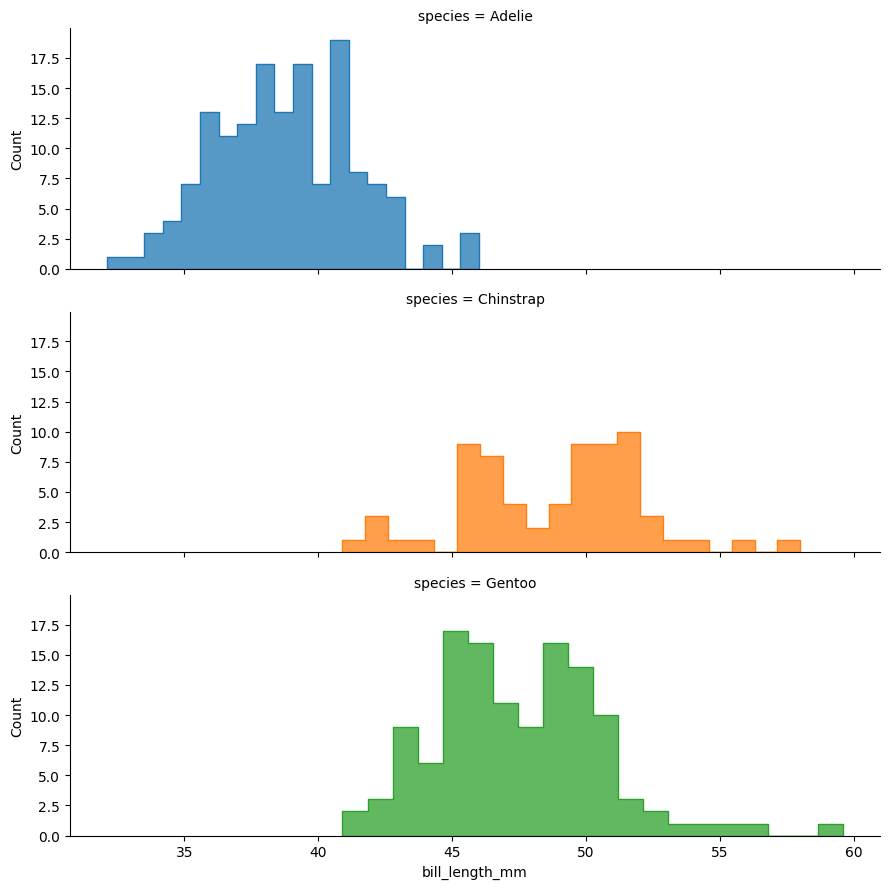

In [10]:
g = sns.FacetGrid(penguins, row="species", hue="species", aspect=3)
g.map(sns.histplot, "bill_length_mm", bins=20, element="step", fill=True)
plt.show()

### 9. Create a facet grid with scattplots of `body_mass_g` vs. `flipper_length_mm` for each `species` using different colors for each `sex`.

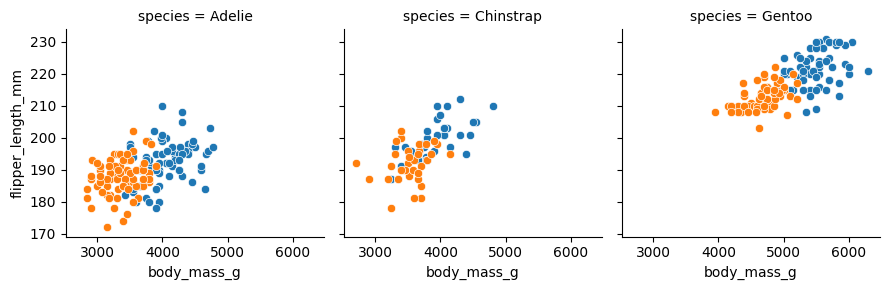

In [11]:
g = sns.FacetGrid(penguins, col="species", hue="sex")
g.map(sns.scatterplot, "body_mass_g", "flipper_length_mm")
plt.show()

### 10. Bonus: improve the facet grid from task 2 by adding a reference line at the median value of `bill_length_mm` for each species. Hint: create a new plotting and use it with the `FacetGrid.map()`.

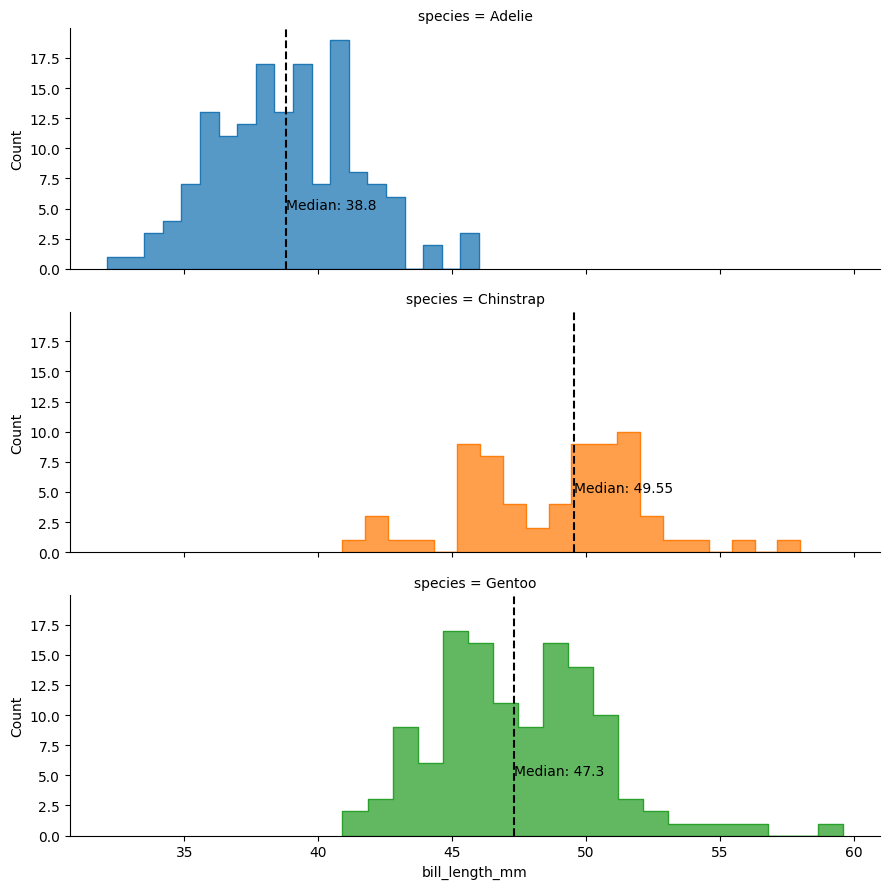

In [12]:
g = sns.FacetGrid(penguins, row="species", hue="species", aspect=3)


def hist_with_median(data, color, **kwargs):  # noqa: ARG001 - **kwargs are expected by map()
    sns.histplot(data, color=color, bins=20, element="step", fill=True)
    # add a vertical line at the median
    plt.axvline(data.median(), color="black", linestyle="--")
    # add an annotation
    plt.text(data.median(), 5, f"Median: {data.median()}", color="black")


g.map(hist_with_median, "bill_length_mm")
plt.show()

### 11. Bonus: recreate the heatmap from task 6, but use the style "dark", color palette "viridis", centered around 0, and context "talk"

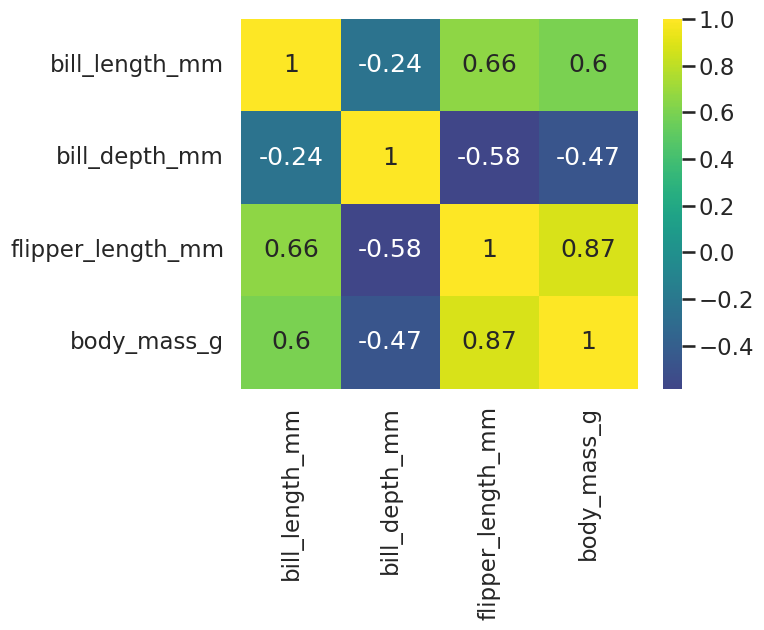

In [13]:
sns.set_style("dark")
sns.set_context("talk")
sns.heatmap(penguins.select_dtypes("float").corr(), annot=True, cmap="viridis", center=0)
plt.show()